# Analogous-bars method
* Run the similarity-centric analogous bars method between simulated head-direction cells and conjunctive cells

In [1]:
using Pkg
Pkg.activate("../../env/.")

  Activating project at `~/analogous_neural/env`


In [2]:
include("../../src/analogous_bars.jl")
include("../../src/Eirene_var.jl")

using .analogous_bars
using .Eirene_var
using DelimitedFiles
using Printf
using HDF5
using Plots
using JLD

WebIO._IJuliaInit()

Main.Eirene_var

In [3]:
using .analogous_bars
using .Eirene_var
using DelimitedFiles
using Printf
using HDF5
using Plots
using JLD

# 1. Load distance matrices


In [4]:
directory = "simulated_data/"

n_HD = 64
n_conj = 800

D_HD = h5read(directory * "HD_dissimilarity.h5", "distance")
D_HD = vector_to_symmetric_matrix(D_HD, n_HD)

D_conj = h5read(directory * "conj_dissimilarity.h5", "distance")
D_conj = vector_to_symmetric_matrix(D_conj, n_conj)

D_HD_conj = h5read(directory * "conj_HD_rate_dissimilarity.h5", "distance")
D_conj_HD = Array(transpose(D_HD_conj));

# 2. Compute persistence

In [5]:
dim = 1

# VR persistence
VR_HD = eirene(D_HD, record = "all", maxdim = dim)
VR_conj = eirene(D_conj, record = "all", maxdim = dim);

# Witness persistence
W_HD_conj = compute_Witness_persistence(D_HD_conj, maxdim = dim);

In [9]:
# get barcodes
barcode_VR_HD = barcode(VR_HD, dim = 1)
barcode_VR_conj = barcode(VR_conj, dim = 1)
barcode_W_HD_conj = barcode(W_HD_conj["eirene_output"], dim = 1);

In [10]:
# compute persistene cutoff scores
HD_idx, HD_cutoff = select_persistent_intervals_IQR(barcode_VR_HD)
W_idx, W_cutoff = select_persistent_intervals_IQR(barcode_W_HD_conj)
conj_idx, conj_cutoff = select_persistent_intervals_IQR(barcode_VR_conj);

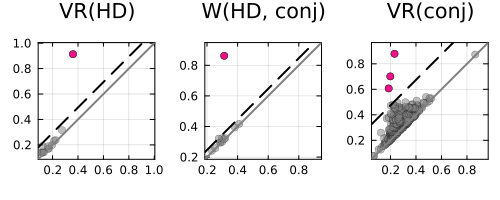

In [11]:
# plot persistence diagrams
p1 = plot_PD(barcode_VR_HD, title = "VR(HD)", highlight = HD_idx, cutoff = HD_cutoff)
p2 = plot_PD(barcode_W_HD_conj, title = "W(HD, conj)", highlight = W_idx, cutoff = W_cutoff)
p3 = plot_PD(barcode_VR_conj, title = "VR(conj)", highlight = conj_idx, cutoff = conj_cutoff)
plot(p1, p2, p3, layout = grid(1,3), size = (500, 200))

# 3. Run basleine similarity-centric analogous bars


In [ ]:
analogous_HD, analogous_conj = analogous_bars.run_baseline_similarity_analogous(VR_P = VR_HD,
                                                                    D_P = D_HD,
                                                                    VR_Q = VR_conj,
                                                                    D_Q = D_conj,
                                                                    W_PQ = W_HD_conj,
                                                                    W_PQ_bars = W_idx,
                                                                    dim = 1);

In [15]:
# get analogous cycles among significant points
analogous_HD_sig, analogous_conj_sig = analogous_cycles_significant(analogous_HD, analogous_conj; significant_P = HD_idx , significant_Q = conj_idx)

(Dict{Any, Any}(12 => [11]), Dict{Any, Any}(12 => [435, 436, 437]))

In [18]:
# Print (potential) analogous cycles

for k in keys(analogous_HD_sig)
    println("Analogous via witness idx: ", string(k))
    println("In grid cells: ", analogous_HD_sig[k])
    println("In conj cells: ", analogous_conj_sig[k])
end

Analogous via witness idx: 12
In grid cells: [11]
In conj cells: [435, 436, 437]


## Plot analogous pairs

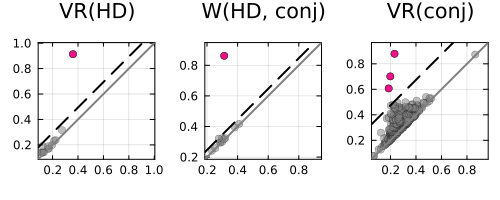

In [20]:
# plot persistence diagrams
witness_bar = 12
p1 = plot_PD(barcode_VR_HD, title = "VR(HD)", highlight = analogous_HD_sig[witness_bar], cutoff = HD_cutoff)
p2 = plot_PD(barcode_W_HD_conj, title = "W(HD, conj)", highlight = [witness_bar], cutoff = W_cutoff)
p3 = plot_PD(barcode_VR_conj, title = "VR(conj)", highlight = analogous_conj_sig[witness_bar], cutoff = conj_cutoff)
plot(p1, p2, p3, layout = grid(1,3), size = (500, 200))

In [53]:
# gather barcodes
# barcodes = Dict()
# barcodes["VR_HD"] = barcode_VR_HD
# barcodes["VR_conj"] = barcode_VR_conj
# barcodes["W_HD_conj"] = barcode_W_HD_conj

# # gather the persistence cutoff and selected bars
# persistence_cutoff = Dict()
# persistence_cutoff["HD_selected"] = HD_idx
# persistence_cutoff["HD_cutoff"] = HD_cutoff
# persistence_cutoff["conj_selected"] = conj_idx
# persistence_cutoff["conj_cutoff"] = conj_cutoff
# persistence_cutoff["W_HD_conj_selected"] = W_idx
# persistence_cutoff["W_HD_conj_cutoff"] = W_cutoff;

# # gather analogous pairs
# analogous_pair = Dict()

# for i in selected
#     pair_i = Dict()
#     pair_i["order"] = ["HD", "conjunctive"]
#     pair_i["baseline_bar_ext"] = [analogous_HD[i]["baseline_bar_extension"], analogous_conj[i]["baseline_bar_extension"]]
#     pair_i["epsilon_0"] = [analogous_HD[i]["epsilon_0"], analogous_conj[i]["epsilon_0"]]
#     pair_i["min_epsilon_with_boundary"] = [analogous_HD[i]["min_epsilon_with_boundary"], analogous_conj[i]["min_epsilon_with_boundary"]]
#     analogous_pair[i] = pair_i
# end

# save output
"""
save("simulated_data/HD_conj_analogous_outputs.jld2", 
    "barcodes", barcodes,
    "persistence_cutoff", persistence_cutoff,
    "analogous_pair", analogous_pair)
"""


In [57]:
# save Witness persistence info
"""
save("simulated_data/HD_conj_W_persistence.jld2", 
   "eirene_output", W_HD_conj["eirene_output"],
    "index2simplex", W_HD_conj["index2simplex"],
    "W_vertex_to_defualt_vertex", W_HD_conj["W_vertex_to_default_vertex"])

save("simulated_data/conj_HD_W_persistence.jld2", 
    "eirene_output", W_conj_HD["eirene_output"],
    "index2simplex", W_conj_HD["index2simplex"],
    "W_vertex_to_defualt_vertex", W_conj_HD["W_vertex_to_default_vertex"])
"""